## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.23.5', '1.5.3', '0.12.2', '3.7.1')

## 1. Load data

In [3]:
df = pd.read_csv('/Users/rachelthaw/Desktop/Machine Learning/Assignment 1/Cars.csv')

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of your data
df.shape

(8128, 13)

In [6]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename some of the following column names, so it's easy to write the code...

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
# rename columns
df.rename(columns = {'name':'brand'},  inplace = True)

In [11]:
# Notice that the column names changed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [12]:
df=df[df['owner']!='Test Drive Car']

In [13]:
owner_mapping ={'First Owner': 1,'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df['owner'] = df['owner'].map(owner_mapping)
print(df.head(5))

                          brand  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700

In [14]:
df['engine'].value_counts()

1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: engine, Length: 121, dtype: int64

In [15]:
df.shape

(8123, 13)

In [16]:
df = df[~df['fuel'].isin(["CNG","LPG"])]
df.fuel.value_counts()

Diesel    4401
Petrol    3627
Name: fuel, dtype: int64

In [17]:
df.shape

(8028, 13)

In [18]:
df['mileage'] = df['mileage'].str.split().str.get(0)
df['mileage']=df['mileage'].astype(float)

df['engine'] = df['engine'].str.split().str.get(0)
df['engine']=df['engine'].astype(float)

df['max_power'] = df['max_power'].str.split().str.get(0)
df['max_power']=df['max_power'].astype(float)

df['brand'] = df['brand'].str.split().str.get(0)

df.drop(['torque'],axis=1,inplace=True)

df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [19]:
df.to_csv('Cleaned_data.csv')

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

#### Countplot

<Axes: xlabel='fuel', ylabel='count'>

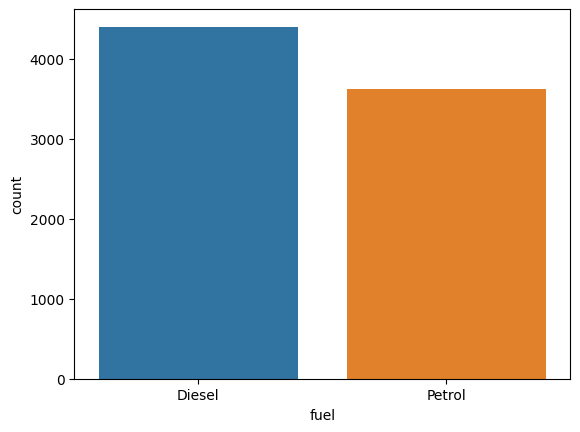

In [20]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

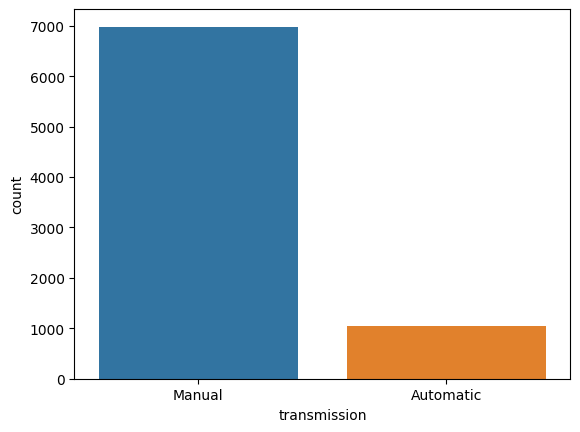

In [21]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seller_type', ylabel='count'>

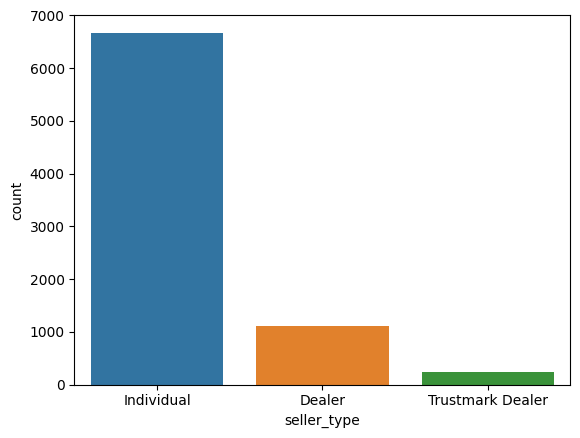

In [22]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='owner', ylabel='count'>

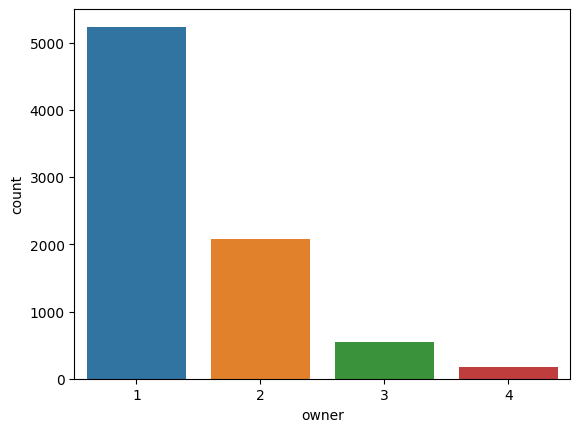

In [23]:
sns.countplot(data = df, x='owner')

<Axes: xlabel='seats', ylabel='count'>

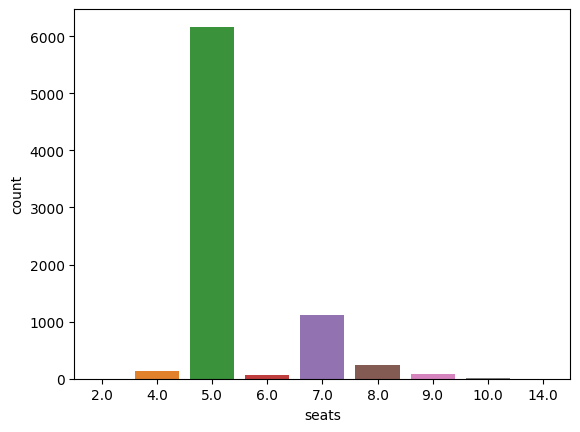

In [24]:
sns.countplot(data = df, x='seats')

<Axes: xlabel='mileage', ylabel='Count'>

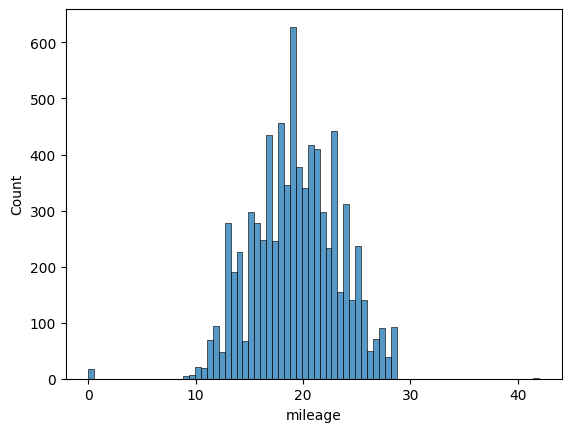

In [25]:
sns.histplot(data = df, x='mileage')

<Axes: title={'center': 'Max power Dirstribution plot'}, xlabel='max_power', ylabel='Density'>

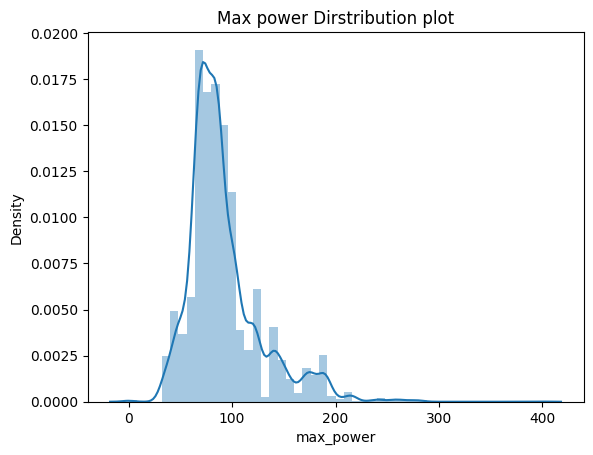

In [26]:
plt.title('Max power Dirstribution plot')
sns.distplot(df['max_power'])

#### Distribution plot

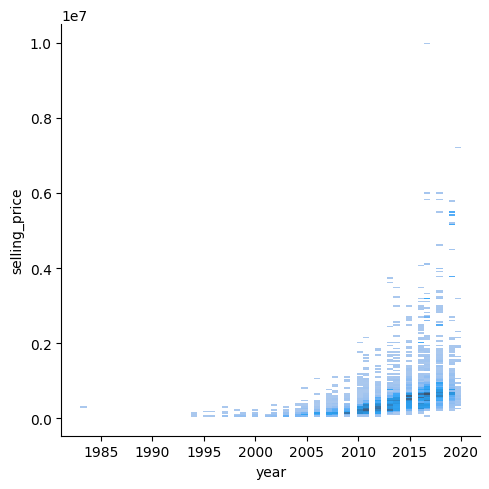

In [27]:
sns.displot(data = df, x = 'year', y='selling_price')

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Text(0.5, 0, 'Seller Type')

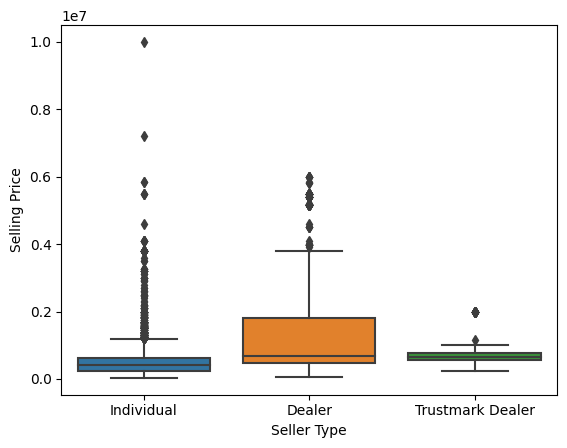

In [28]:
sns.boxplot(x = df["seller_type"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

Text(0.5, 0, 'Transmission')

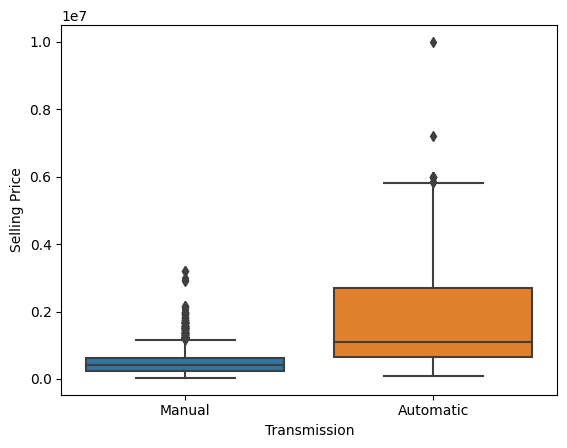

In [29]:
sns.boxplot(x = df["transmission"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Transmission")

<Axes: xlabel='fuel', ylabel='selling_price'>

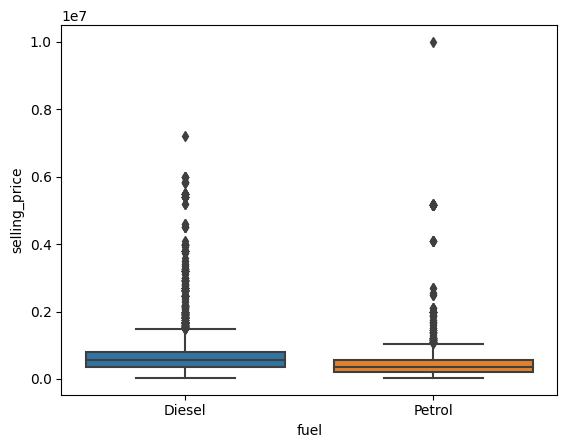

In [30]:
sns.boxplot(data = df, x = 'fuel', y = 'selling_price')

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the car price.  It's also for checking whether certain features are too correlated.

<Axes: >

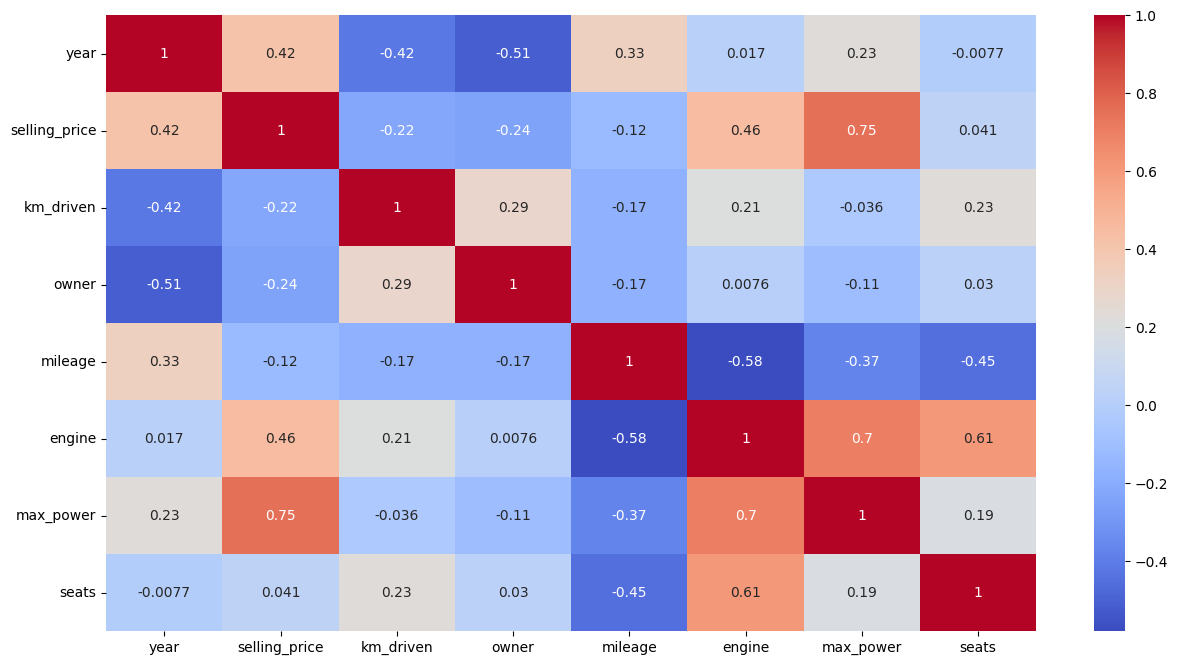

In [31]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Label encoding for fuel, transmission and seller_type



In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [33]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [34]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique() 

array([1, 0])

In [35]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [36]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [37]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

## Label encoding for brands

In [38]:
df['brand'].isna().sum()

0

In [39]:
from sklearn.preprocessing import LabelEncoder

brand_le = LabelEncoder()
df.brand = brand_le.fit_transform(df.brand)

df.brand.unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [40]:
df.brand.value_counts()

20    2378
11    1393
19     772
28     733
29     488
10     466
9      397
4      228
26     228
30     185
3      120
27     105
23      81
13      71
31      67
6       65
21      54
7       47
2       37
17      34
14      31
22      14
8        6
16       6
12       5
15       4
0        4
5        3
18       3
1        1
24       1
25       1
Name: brand, dtype: int64

In [41]:
brand_le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [42]:
# name_map = {}
# keys = le.classes_
# values = df.brand.unique()
# for key in keys:
#     for value in values:
#         name_map[key] = value
#         values = np.delete(values, np.where(values == value))
#         break

# name_map

In [43]:
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


<Axes: >

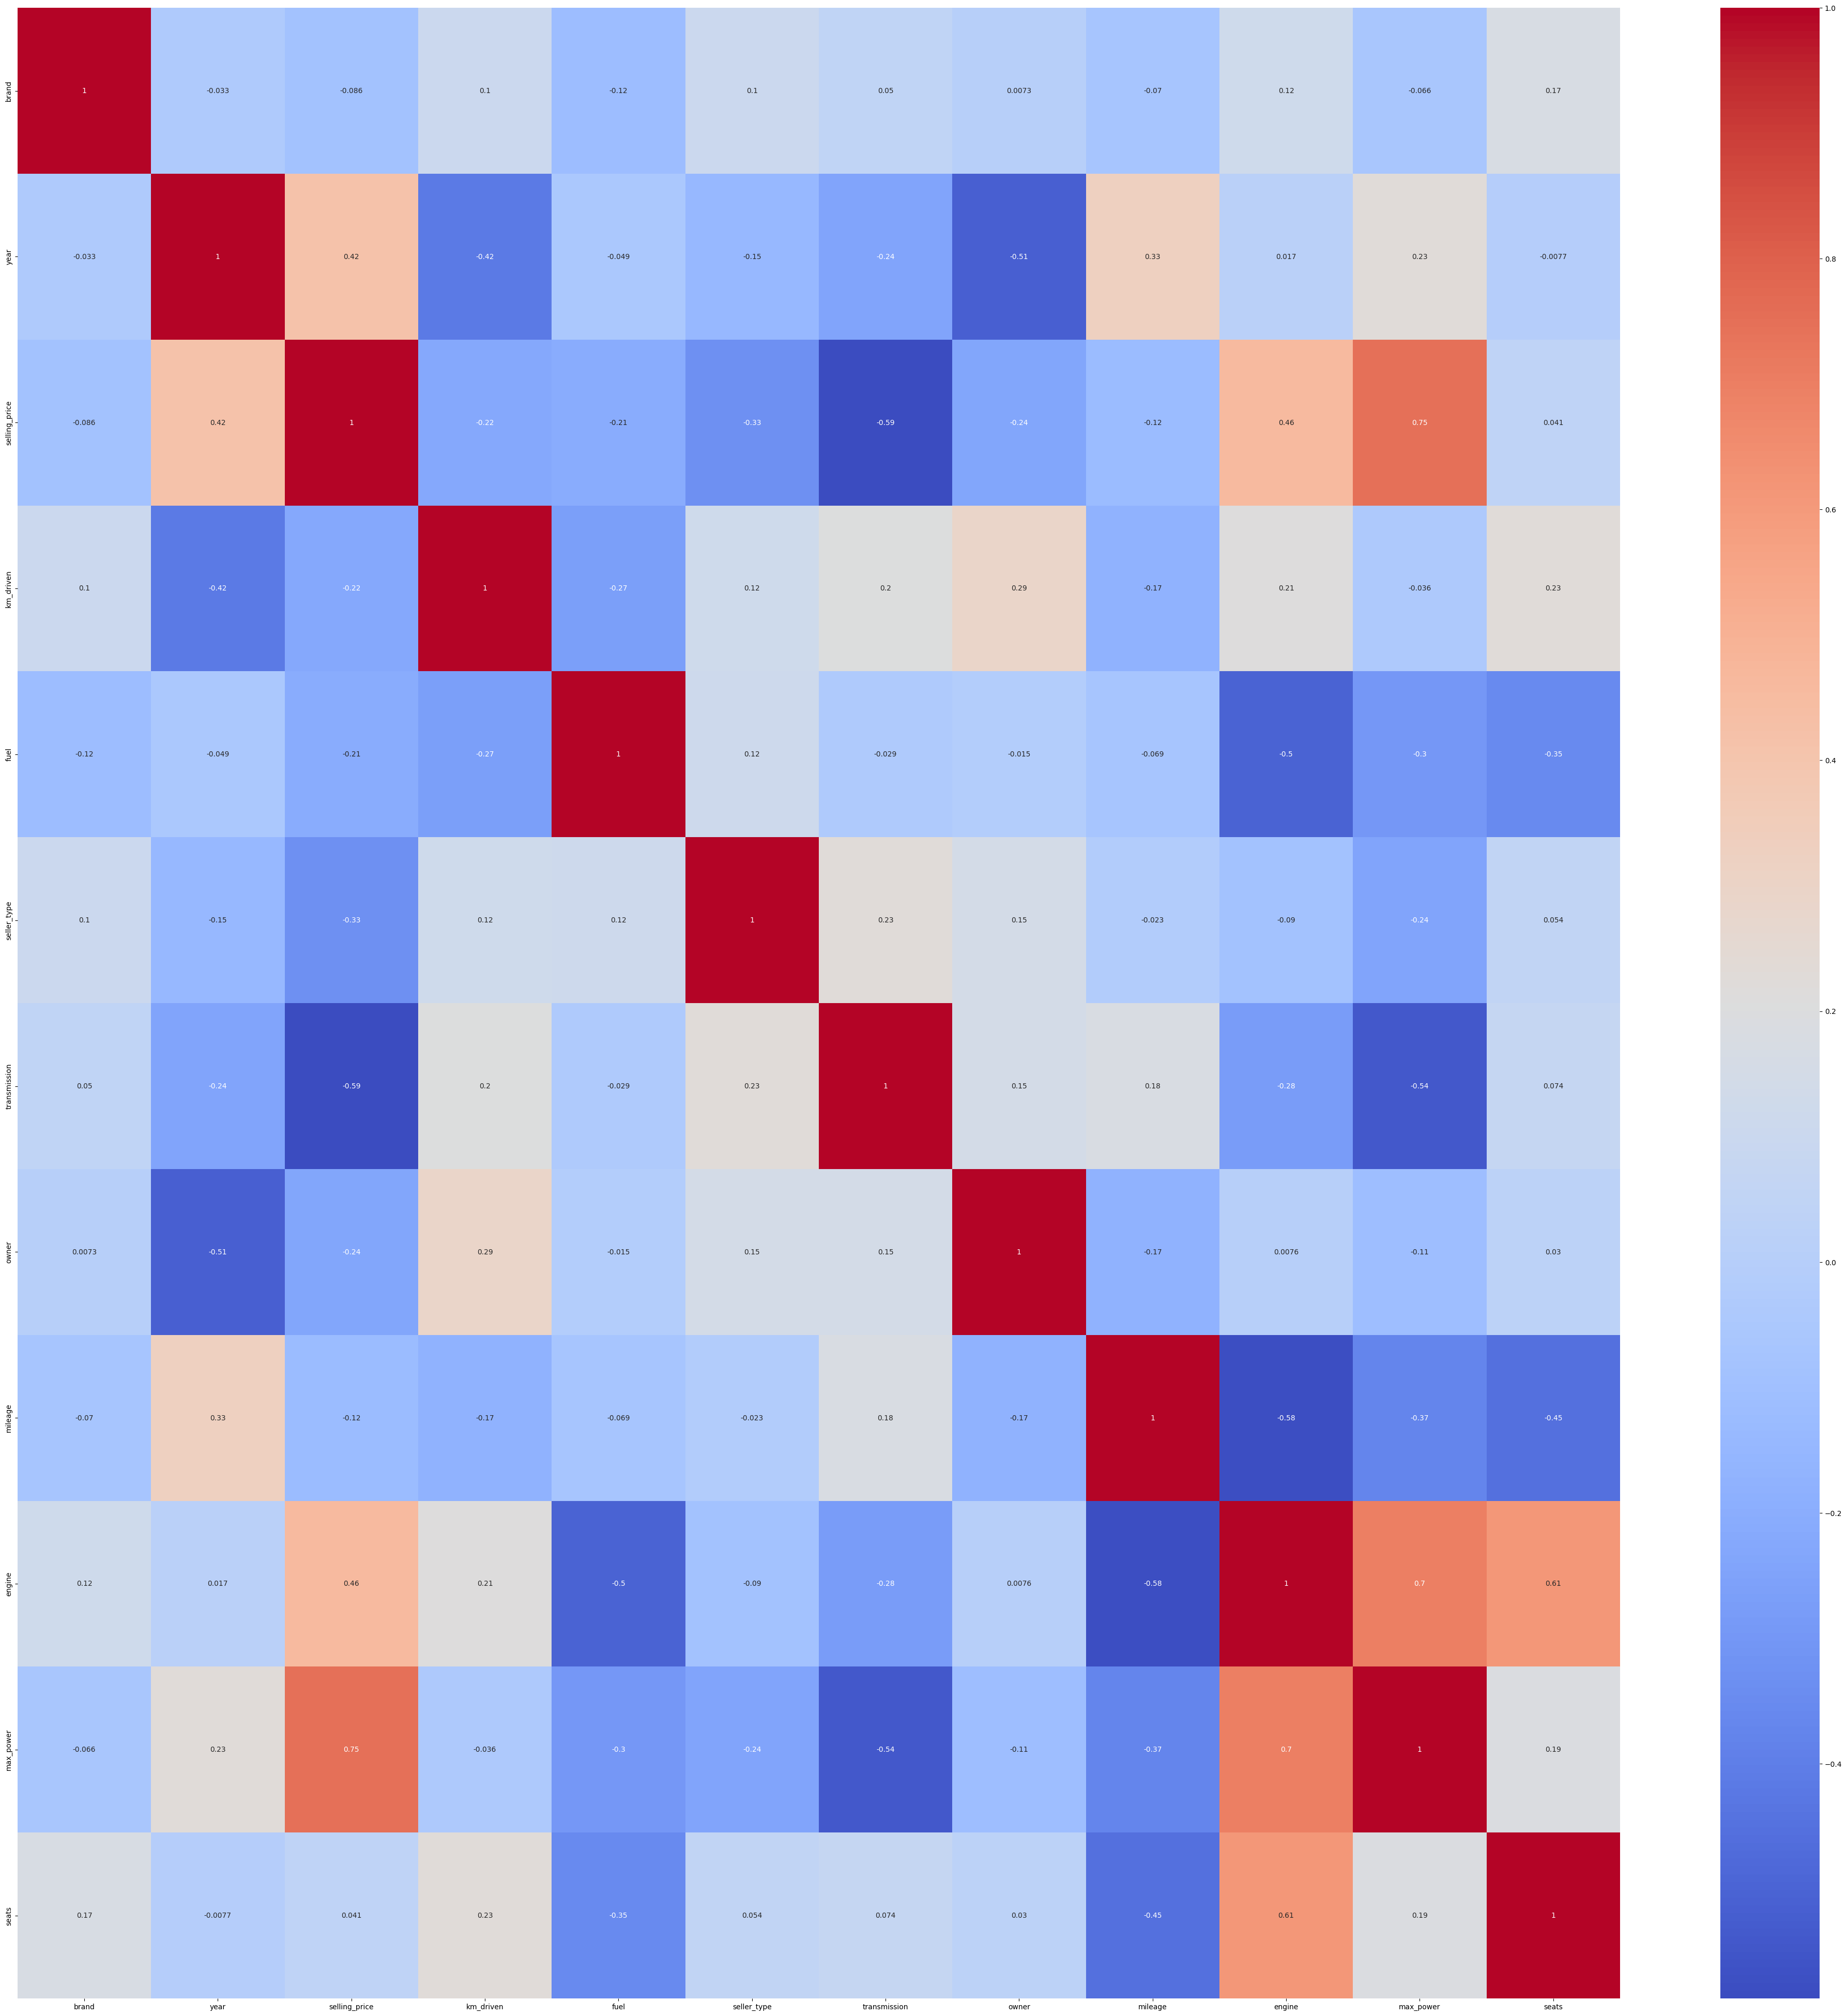

In [44]:
# Let's check out heatmap
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [45]:
df.describe()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8.028000e+03,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,18.004235,2013.815521,6.403937e+05,6.977314e+04,0.451794,0.890010,0.869706,1.458022,19.391962,1462.914640,91.819726,5.421551
std,7.388504,4.030836,8.027015e+05,5.664419e+04,0.497702,0.395861,0.336648,0.715283,4.001972,504.759742,35.804513,0.963125
min,0.000000,1983.000000,2.999900e+04,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,0.000000,2.000000
25%,11.000000,2011.000000,2.600000e+05,3.500000e+04,0.000000,1.000000,1.000000,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,20.000000,2015.000000,4.500000e+05,6.000000e+04,0.000000,1.000000,1.000000,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,20.000000,2017.000000,6.800000e+05,9.800000e+04,1.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,102.000000,5.000000
max,31.000000,2020.000000,1.000000e+07,2.360457e+06,1.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000


In [46]:
df['max_power'].loc[df['max_power'] == 0].count()

6

#### Predictive Power Score


<Axes: xlabel='x', ylabel='y'>

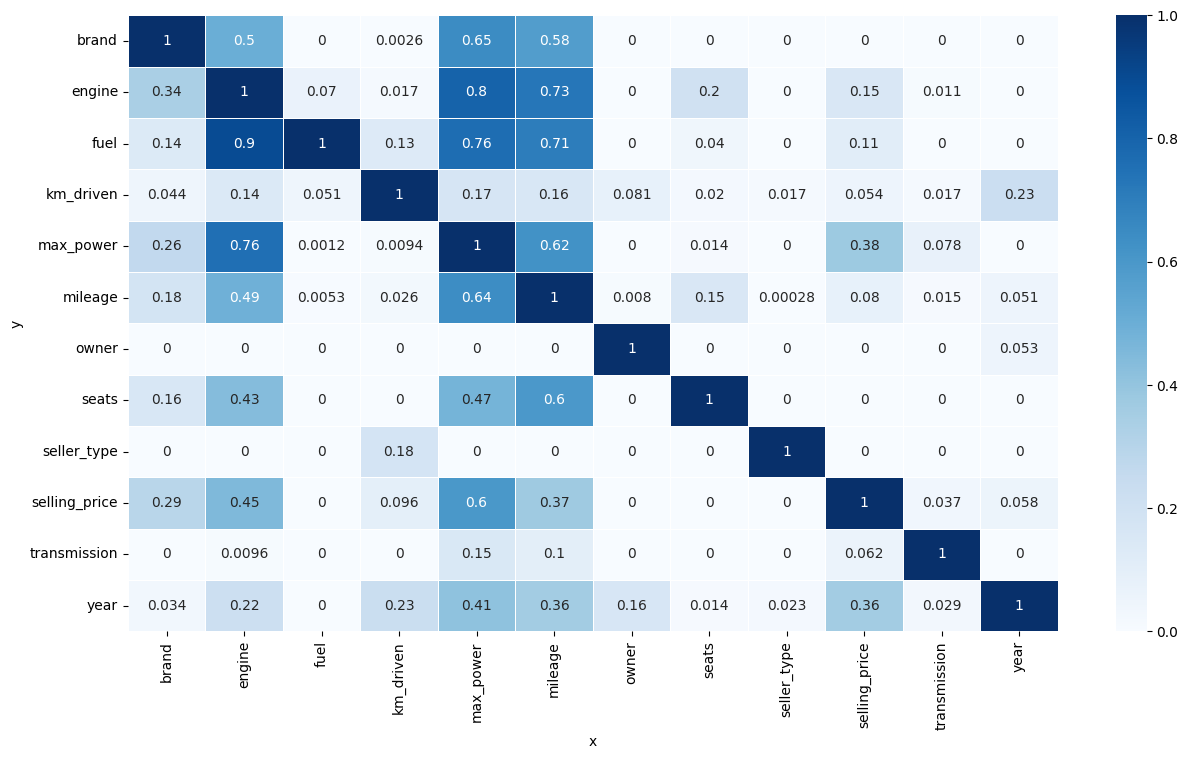

In [47]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
df

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

<Axes: >

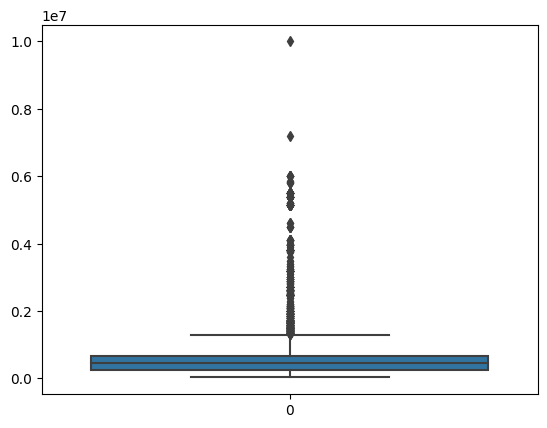

In [48]:
sns.boxplot(df['selling_price'])

## 3. Feature Engineering

We gonna skip for this tutorial.  But we can certainly try to combine some columsn to create new features.

## 4. Feature selection

In [49]:
features = ['brand','year','max_power','mileage'] 

In [50]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [51]:
X = df[features]

y = np.log(df["selling_price"])
# y = df["selling_price"]

### Train test split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

## 5. Preprocessing

### Null values

In [53]:
#check for null values
X_train[features].isna().sum()

brand          0
year           0
max_power    152
mileage      155
dtype: int64

In [54]:
X_test[features].isna().sum()

brand         0
year          0
max_power    56
mileage      59
dtype: int64

In [55]:
y_train.isna().sum()

0

In [56]:
y_test.isna().sum()

0

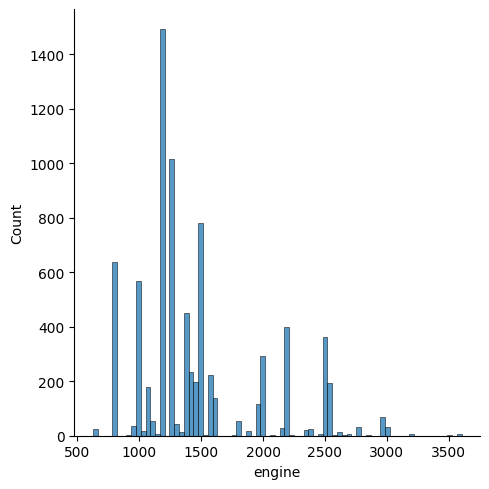

In [57]:
sns.displot(data=df, x='engine')

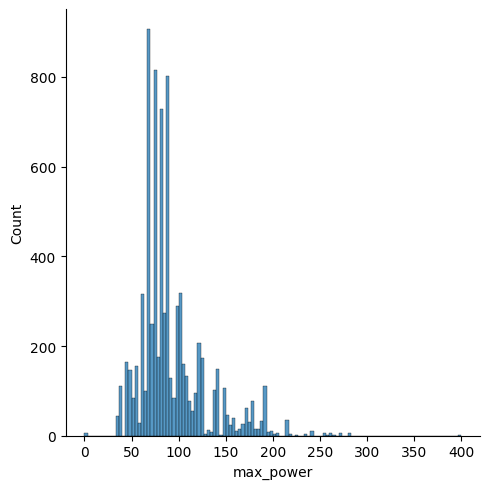

In [58]:
sns.displot(data=df, x='max_power')

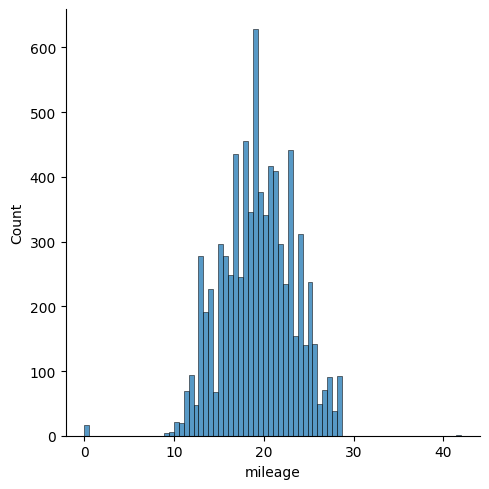

In [59]:
sns.displot(data=df, x='mileage')

In [60]:
#X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [61]:
#X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [62]:
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].mean()

In [63]:
#check again
X_train[features].isna().sum()

brand        0
year         0
max_power    0
mileage      0
dtype: int64

In [64]:
X_test[features].isna().sum()

brand        0
year         0
max_power    0
mileage      0
dtype: int64

In [65]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

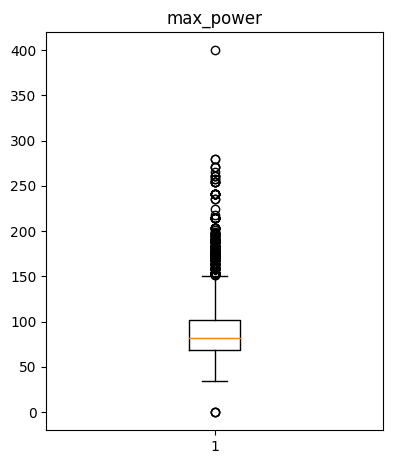

In [66]:
# Create a dictionary of columns.
#col_dict = {'engine':1,'max_power':2,'mileage':3}
col_dict = {'max_power':1}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [67]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [68]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%

---------------max_power---------------

Number of outliers: 395
Percent of data that is outlier: 7.03%

---------------mileage---------------

Number of outliers: 17
Percent of data that is outlier: 0.3%


### Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [70]:
X_train

array([[ 1.35587935, -0.95583608, -0.64247931, -0.0652653 ],
       [ 0.27628659, -2.96437869, -1.56089721, -0.82795478],
       [ 1.49082844, -0.2026326 , -0.07621727, -0.65450032],
       ...,
       [-0.93825525,  0.29950305, -0.26937204, -0.11373052],
       [ 1.35587935,  1.05270653,  1.79305016, -0.44533464],
       [ 1.08598116,  0.55057088, -1.09307809,  1.48562166]])

In [71]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Model Selection

In [72]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.12760596435001906
r2:  0.8295519210450926


In [73]:
import pickle

# save the model to disk
lr_filename = 'lr_car_price_predicition.model'
pickle.dump(lr, open(lr_filename, 'wb'))

### Much better: Cross validation + Grid search

In [74]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 42), 
              RandomForestRegressor(n_estimators = 1000, random_state = 42)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....

In [75]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.11312502 -0.1243136  -0.10189583 -0.10626494 -0.11317555]; Mean: -0.11175498930614898
SVR - Score: [-0.06621    -0.07796076 -0.07780791 -0.06674513 -0.06732964]; Mean: -0.07121068928825805
KNeighbors Regressor - Score: [-0.06432908 -0.05931233 -0.0613433  -0.05167469 -0.05900126]; Mean: -0.05913213179795875
Decision-Tree Regressor - Score: [-0.06251145 -0.06649119 -0.07648383 -0.06516651 -0.06657778]; Mean: -0.06744615429912461
Random-Forest Regressor - Score: [-0.04580578 -0.04832925 -0.05676012 -0.04937183 -0.05409332]; Mean: -0.050872061850103525


### Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [1, 3, 5, 10, 15, 20],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 25, 30, 35, 40, 45, 50]}

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')


grid.fit(X_train, y_train); 

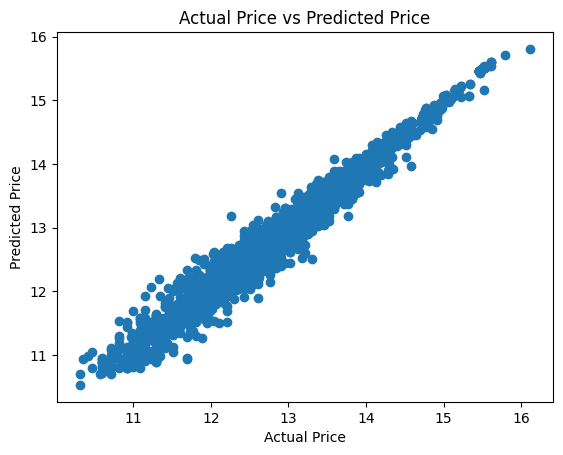

In [77]:
plt.scatter(y_train, grid.predict(X_train))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

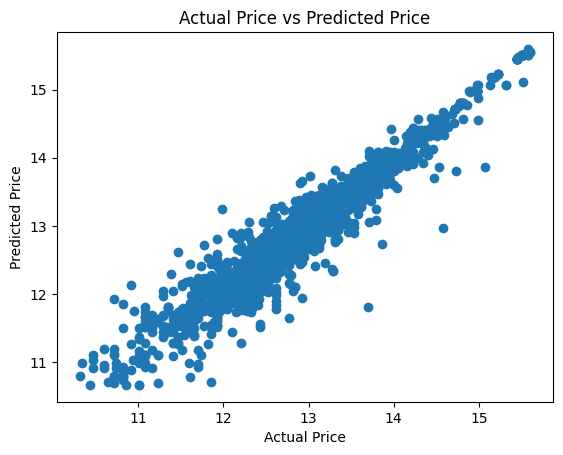

In [78]:
plt.scatter(y_test, grid.predict(X_test))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [79]:
grid.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 50}

In [80]:
#grid_search's best score
best_mse = grid.best_score_

In [81]:
best_mse

-0.05195645277613853

## 7. Testing

Of course, once we do everything.  We can try to shoot with the final test set.  We should no longer do anything like improving the model.  It's illegal!  since X_test is the final final test set.

In [82]:
from sklearn.metrics import mean_squared_error
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.053561192848587715

## 8. Analysis:  Feature Importance

In [83]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.02679489, 0.477878  , 0.45384699, 0.04148012])

<BarContainer object of 4 artists>

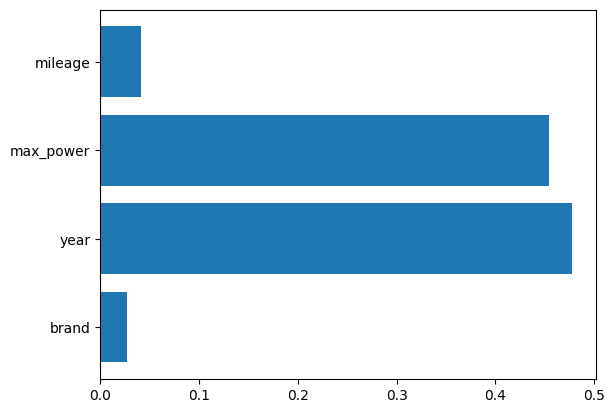

In [84]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

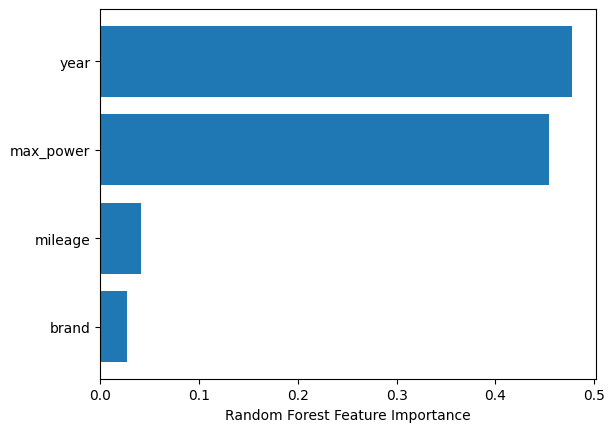

In [85]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [86]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

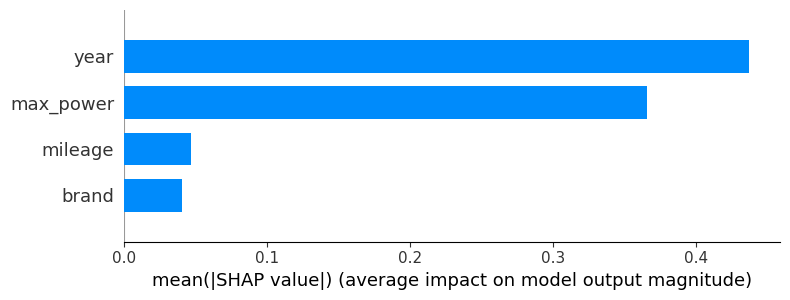

In [87]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [88]:
import pickle
model = {
    'model': grid,
    'scaler': scaler,
    'year_default' : 2017,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
    'brand_le' : brand_le
}

# save the model to disk
filename = 'car_price_predicition1.model'
pickle.dump(model, open(filename, 'wb'))

In [89]:
# load the model from disk
loaded_file = pickle.load(open(filename, 'rb'))

In [90]:
loaded_model = loaded_file['model']
loaded_scaler = loaded_file['scaler']

['year','max_power','mileage','brand']

In [91]:
brand_le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [92]:
df[['brand','year','max_power','mileage','selling_price']].loc[10]

brand                26.00
year               2014.00
max_power           108.45
mileage              19.01
selling_price    500000.00
Name: 10, dtype: float64

In [95]:
#'brand','year','max_power','mileage'
sample_np = np.array([[26, 2014, 108.45, 19.01]])
sample = loaded_scaler.transform(sample_np)
sample

array([[ 1.08598116,  0.04843522,  0.48975776, -0.08567171]])

In [96]:
predicted_price = loaded_model.predict(sample)
predicted_price= np.exp(predicted_price)
predicted_price

array([447466.64653052])

# **Assignment Report**

In this assignment, I began by cleaning the dataset and conducting an Exploratory Data Analysis (EDA) to thoroughly understand the data structure. After careful consideration, I finalized four features for the model: brand, max_power, mileage, and year. The features max_power, engine, and mileage showed high correlation scores according to the heatmap. I chose to include max_power and mileage while excluding the engine because max_power is closely related to engine power, and people often consider max power as a key factor when evaluating a car's engine. Since these two features are interrelated, including both would be redundant. For the brand, I included it because the brand name significantly influences consumer buying decisions. As for the year, the distribution plot revealed that recently released cars tend to have higher selling prices, making it a crucial factor in price prediction.

Following the feature selection, I split the dataset into training and testing sets and handled any missing values. I then applied scaling to the data before passing it through various regression algorithms, including Linear Regression, Random Forest Regression, KNeighbors Regressor, Decision Tree Regressor, and Support Vector Regression (SVR). During cross-validation, Random Forest Regression demonstrated the lowest mean MSE, indicating its strong performance in handling the non-linear relationships in the data. In contrast, Linear Regression, which seeks linear relationships between features, performed the worst, likely due to its limitations in capturing the complexity of the model. Given the non-linear nature of the problem, I selected Random Forest Regression as the optimal model for predicting car prices.
For the features importance, max_power and year shows the most signifiacnt influences in selling price compared with the left 2 features.